## Installation: `wyn-keras`

In [1]:
! pip install wyn-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully un

## Installation: `medmnist`

In [1]:
! pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=d6cd923822f985e1027c2297dd32341a75b7e84ceb8aa15ec975c04252ab58d0
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


## Acquire Data

In [2]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

import medmnist
from medmnist import INFO, Evaluator

In [3]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/


We first work on a 2D dataset with size 28x28

In [4]:
data_flag = 'pathmnist'
# data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

First, we read the MedMNIST data, preprocess them and encapsulate them into dataloader form.

In [5]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

100%|██████████| 206M/206M [00:14<00:00, 14.2MB/s]


Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz


In [6]:
print(train_dataset)
print("===================")
print(test_dataset)

Dataset PathMNIST of size 28 (pathmnist)
    Number of datapoints: 89996
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3×224×224 into 3×28×28, and split NCT-CRC-HE-100K

In [7]:
# visualization

train_dataset.montage(length=1)

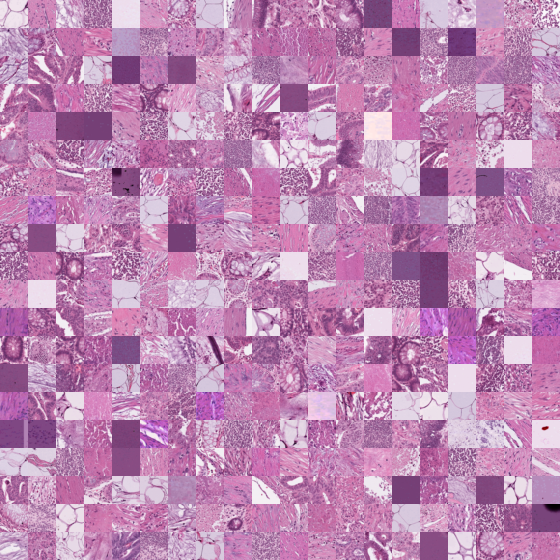

In [8]:
# montage

train_dataset.montage(length=20)

Convert dimensions

In [9]:
for inputs, targets in tqdm(train_loader):
    print(inputs.shape, targets.shape)
    break

  0%|          | 0/704 [00:00<?, ?it/s]

torch.Size([128, 3, 28, 28]) torch.Size([128, 1])


## Helper Functions

In [10]:
import torch

def rearrange_tensor(input_tensor: torch.Tensor) -> torch.Tensor:
    """
    Rearrange the given input tensor from (B, C, H, W) to (B, H, W, C).

    Args:
        input_tensor (torch.Tensor): A PyTorch tensor in the shape (B, C, H, W).

    Returns:
        torch.Tensor: The rearranged tensor in the shape (B, H, W, C).
    """
    # permute changes the ordering of dimensions
    # here, we move the channel dimension (C) to the end
    # effectively going from (B, C, H, W) --> (B, H, W, C)
    output_tensor = input_tensor.permute(0, 2, 3, 1)
    return output_tensor

In [11]:
X = rearrange_tensor(inputs)
print(X.shape)

torch.Size([128, 28, 28, 3])


In [12]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def plot_random_images(
    images: np.ndarray,
    targets: torch.Tensor
) -> None:
    """
    Plots 10 random images from a batch of images arranged in a grid,
    displaying each image along with its label as the title.

    Args:
        images (np.ndarray):
            A numpy array of shape (batch_size, height, width, channels).
            Example shape: (128, 28, 28, 3).

        targets (torch.Tensor):
            A PyTorch tensor of shape (batch_size, 1) (or (batch_size,)),
            containing the labels for each image.

    Returns:
        None
    """
    # Select 10 random indices without replacement
    random_indices = np.random.choice(images.shape[0], size=10, replace=False)

    # Create a 2x5 grid for plotting
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    axes = axes.flatten()  # Flatten the axes for easier handling

    # Loop over the chosen indices and plot each image with its label
    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx])
        # Convert the single-element label to a Python int
        label_value = targets[idx].item()
        axes[i].set_title(f"label: {label_value}")
        axes[i].axis('off')  # Hide the axis to make the image clearer

    plt.tight_layout()
    plt.show()

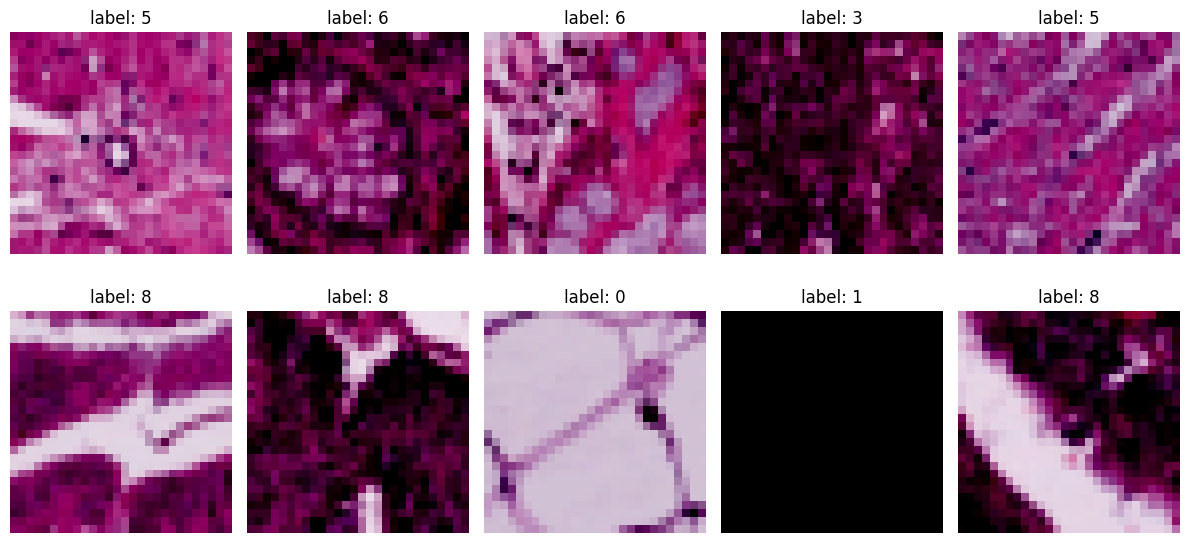

In [14]:
plot_random_images(X.numpy(), targets)

In [13]:
print(type(X), type(targets))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [14]:
X = X.numpy()
y = targets.numpy()

print(type(X), type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(128, 28, 28, 3) (128, 1)


In [15]:
from wyn_keras.vit import ViT
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [16]:
# Create an instance of the ViT class
num_classes = np.unique(targets).shape[0]
print(num_classes)

vit_model = ViT(num_classes=num_classes, input_shape=(28, 28, 3), num_epochs=100)

# Create the ViT model
model = vit_model.create_vit_classifier()

9


In [17]:
%%time

i = 0

for inputs, targets in tqdm(train_loader):

    try:

        # Get data
        X = rearrange_tensor(inputs)
        X = X.numpy()
        y = targets.numpy()

        # Split train and test set
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

        print('Checkpoint:')
        print(x_train.shape, y_train.shape)
        print(x_test.shape, y_test.shape)
        print(np.unique(y_train), np.unique(y_test))

        # Train the model
        history = vit_model.run_experiment(model, x_train, y_train, x_test, y_test)

        # Plot patches
        # vit_model.plot_patches(x_test)

        i += 1

        print('Checkout: ', i)

    except Exception as e:
        print(e)
        break

  0%|          | 0/704 [00:00<?, ?it/s]

Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 3 4 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 17s 17s/step - loss: 4.1676 - accuracy: 0.1262 - top-5-accuracy: 0.6602 - val_loss: 6.1462 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.5833
Epoch 2/100
1/1 [==============================] - 0s 295ms/step - loss: 8.3109 - accuracy: 0.1359 - top-5-accuracy: 0.7087 - val_loss: 9.6762 - val_accuracy: 0.0833 - val_top-5-accuracy: 0.5833
Epoch 3/100
1/1 [==============================] - 0s 226ms/step - loss: 10.4477 - accuracy: 0.1650 - top-5-accuracy: 0.5825 - val_loss: 13.2916 - val_accuracy: 0.0833 - val_top-5-accuracy: 0.5833
Epoch 4/100
1/1 [==============================] - 0s 222ms/step - loss: 14.4849 - accuracy: 0.1262 - top-5-accuracy: 0.5922 - val_loss: 12.2517 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 218ms/step - loss: 15.7421 - accuracy: 0.2136 - top-5-accuracy: 0

  0%|          | 1/704 [00:44<8:37:08, 44.14s/it]

Test accuracy: 30.77%
Test top 5 accuracy: 84.62%
Checkout:  1
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 2 4 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.8089 - accuracy: 0.2816 - top-5-accuracy: 0.7864 - val_loss: 4.0661 - val_accuracy: 0.0833 - val_top-5-accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 287ms/step - loss: 3.1017 - accuracy: 0.1845 - top-5-accuracy: 0.6990 - val_loss: 2.3973 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 2.3807 - accuracy: 0.1845 - top-5-accuracy: 0.6893 - val_loss: 2.0400 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 226ms/step - loss: 2.3550 - accuracy: 0.2039 - top-5-accuracy: 0.6699 - val_loss: 1.9680 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 224ms

  0%|          | 2/704 [01:23<8:01:10, 41.13s/it]

Test accuracy: 15.38%
Test top 5 accuracy: 84.62%
Checkout:  2
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 5 7]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 4.9665 - accuracy: 0.2136 - top-5-accuracy: 0.6990 - val_loss: 1.7678 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 296ms/step - loss: 2.4831 - accuracy: 0.2233 - top-5-accuracy: 0.7961 - val_loss: 1.9605 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.6667
Epoch 3/100
1/1 [==============================] - 0s 231ms/step - loss: 2.4195 - accuracy: 0.2039 - top-5-accuracy: 0.6893 - val_loss: 1.7168 - val_accuracy: 0.1667 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 2.3503 - accuracy: 0.1553 - top-5-accuracy: 0.6505 - val_loss: 1.6553 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 229ms/step 

  0%|          | 3/704 [02:01<7:45:54, 39.88s/it]

Test accuracy: 15.38%
Test top 5 accuracy: 92.31%
Checkout:  3
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 2 4 5 6 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.3248 - accuracy: 0.1845 - top-5-accuracy: 0.6602 - val_loss: 3.0169 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.5833
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 3.6102 - accuracy: 0.1359 - top-5-accuracy: 0.7087 - val_loss: 1.9685 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 233ms/step - loss: 2.1990 - accuracy: 0.1942 - top-5-accuracy: 0.6214 - val_loss: 2.0119 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 230ms/step - loss: 2.3158 - accuracy: 0.1650 - top-5-accuracy: 0.6602 - val_loss: 1.9652 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 228ms/step 

  1%|          | 4/704 [02:41<7:45:43, 39.92s/it]

Test accuracy: 53.85%
Test top 5 accuracy: 92.31%
Checkout:  4
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 5 7 8]
Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 1.8672 - accuracy: 0.3592 - top-5-accuracy: 0.8447 - val_loss: 1.7307 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 0s 279ms/step - loss: 2.2075 - accuracy: 0.2913 - top-5-accuracy: 0.7767 - val_loss: 1.6053 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 2.1357 - accuracy: 0.3010 - top-5-accuracy: 0.8058 - val_loss: 1.4036 - val_accuracy: 0.7500 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 231ms/step - loss: 1.9281 - accuracy: 0.3398 - top-5-accuracy: 0.8155 - val_loss: 1.5360 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 232ms/step - 

  1%|          | 5/704 [03:20<7:40:58, 39.57s/it]

Test accuracy: 30.77%
Test top 5 accuracy: 76.92%
Checkout:  5
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 3 4 5 6 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.2803 - accuracy: 0.2233 - top-5-accuracy: 0.7184 - val_loss: 2.5646 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.5833
Epoch 2/100
1/1 [==============================] - 0s 288ms/step - loss: 3.0776 - accuracy: 0.2330 - top-5-accuracy: 0.6699 - val_loss: 1.6795 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 240ms/step - loss: 1.9501 - accuracy: 0.2718 - top-5-accuracy: 0.8155 - val_loss: 1.9923 - val_accuracy: 0.0833 - val_top-5-accuracy: 0.8333
Epoch 4/100
1/1 [==============================] - 0s 236ms/step - loss: 1.9774 - accuracy: 0.3010 - top-5-accuracy: 0.7767 - val_loss: 1.9885 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 237ms/st

  1%|          | 6/704 [04:04<7:56:30, 40.96s/it]

Test accuracy: 7.69%
Test top 5 accuracy: 92.31%
Checkout:  6
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 3 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 2.0331 - accuracy: 0.2718 - top-5-accuracy: 0.8252 - val_loss: 1.8230 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 0s 275ms/step - loss: 2.3340 - accuracy: 0.3204 - top-5-accuracy: 0.7573 - val_loss: 1.6280 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.8333
Epoch 3/100
1/1 [==============================] - 0s 241ms/step - loss: 2.0272 - accuracy: 0.2718 - top-5-accuracy: 0.7282 - val_loss: 1.7711 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 235ms/step - loss: 2.0718 - accuracy: 0.2233 - top-5-accuracy: 0.6893 - val_loss: 1.7813 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 242ms/s

  1%|          | 7/704 [04:45<7:57:00, 41.06s/it]

Test accuracy: 53.85%
Test top 5 accuracy: 92.31%
Checkout:  7
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 3 4 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.2897 - accuracy: 0.3398 - top-5-accuracy: 0.8252 - val_loss: 3.4808 - val_accuracy: 0.0833 - val_top-5-accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 4.1506 - accuracy: 0.2039 - top-5-accuracy: 0.6893 - val_loss: 2.0907 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 2.5235 - accuracy: 0.2913 - top-5-accuracy: 0.7767 - val_loss: 1.9033 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 236ms/step - loss: 2.3368 - accuracy: 0.2621 - top-5-accuracy: 0.7282 - val_loss: 1.9956 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 237ms/step

  1%|          | 8/704 [05:26<7:57:30, 41.16s/it]

Test accuracy: 53.85%
Test top 5 accuracy: 100.00%
Checkout:  8
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 3 4 6 7 8]
Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 1.7164 - accuracy: 0.3592 - top-5-accuracy: 0.9320 - val_loss: 1.8513 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 0s 285ms/step - loss: 3.0224 - accuracy: 0.1845 - top-5-accuracy: 0.7670 - val_loss: 1.4138 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 240ms/step - loss: 2.1194 - accuracy: 0.1845 - top-5-accuracy: 0.7864 - val_loss: 1.6917 - val_accuracy: 0.2500 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 237ms/step - loss: 2.1290 - accuracy: 0.2816 - top-5-accuracy: 0.8350 - val_loss: 1.6390 - val_accuracy: 0.2500 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 233ms

  1%|▏         | 9/704 [06:08<7:58:32, 41.31s/it]

Test accuracy: 53.85%
Test top 5 accuracy: 92.31%
Checkout:  9
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 5 6 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 3.3235 - accuracy: 0.5049 - top-5-accuracy: 0.9320 - val_loss: 1.7730 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 0s 282ms/step - loss: 2.1918 - accuracy: 0.3981 - top-5-accuracy: 0.9320 - val_loss: 2.2531 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.8333
Epoch 3/100
1/1 [==============================] - 0s 236ms/step - loss: 1.9737 - accuracy: 0.3689 - top-5-accuracy: 0.8835 - val_loss: 2.4576 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.8333
Epoch 4/100
1/1 [==============================] - 0s 234ms/step - loss: 2.4338 - accuracy: 0.3010 - top-5-accuracy: 0.8544 - val_loss: 2.0483 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 235m

  1%|▏         | 10/704 [06:49<7:55:15, 41.09s/it]

Test accuracy: 61.54%
Test top 5 accuracy: 100.00%
Checkout:  10
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 5 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.7776 - accuracy: 0.5049 - top-5-accuracy: 0.9417 - val_loss: 4.2386 - val_accuracy: 0.0833 - val_top-5-accuracy: 0.4167
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 3.5381 - accuracy: 0.2039 - top-5-accuracy: 0.6893 - val_loss: 2.8220 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.5833
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 2.1013 - accuracy: 0.2816 - top-5-accuracy: 0.8447 - val_loss: 1.5857 - val_accuracy: 0.4167 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.6515 - accuracy: 0.3689 - top-5-accuracy: 0.9612 - val_loss: 1.2220 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 236ms/step 

  2%|▏         | 11/704 [07:31<7:59:14, 41.49s/it]

Test accuracy: 61.54%
Test top 5 accuracy: 100.00%
Checkout:  11
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 3 4 5 7 8]
Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 1.3735 - accuracy: 0.4660 - top-5-accuracy: 0.9806 - val_loss: 2.7299 - val_accuracy: 0.0833 - val_top-5-accuracy: 0.6667
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 3.5424 - accuracy: 0.1262 - top-5-accuracy: 0.6117 - val_loss: 2.1191 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.6667
Epoch 3/100
1/1 [==============================] - 0s 246ms/step - loss: 1.8122 - accuracy: 0.3689 - top-5-accuracy: 0.8155 - val_loss: 1.9448 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.7081 - accuracy: 0.3592 - top-5-accuracy: 0.8835 - val_loss: 1.4300 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 236ms/step

  2%|▏         | 12/704 [08:14<8:02:33, 41.84s/it]

Test accuracy: 69.23%
Test top 5 accuracy: 92.31%
Checkout:  12
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 5 6 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.5641 - accuracy: 0.4757 - top-5-accuracy: 0.9417 - val_loss: 2.3153 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.5193 - accuracy: 0.2816 - top-5-accuracy: 0.8155 - val_loss: 1.8091 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 233ms/step - loss: 1.9325 - accuracy: 0.2427 - top-5-accuracy: 0.8058 - val_loss: 1.6530 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 233ms/step - loss: 1.7217 - accuracy: 0.3786 - top-5-accuracy: 0.8252 - val_loss: 1.7629 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 233ms/

  2%|▏         | 13/704 [08:56<8:04:19, 42.05s/it]

Test accuracy: 76.92%
Test top 5 accuracy: 92.31%
Checkout:  13
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 3 5 6]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.4007 - accuracy: 0.5243 - top-5-accuracy: 0.9612 - val_loss: 1.7627 - val_accuracy: 0.2500 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 279ms/step - loss: 2.2400 - accuracy: 0.3592 - top-5-accuracy: 0.8835 - val_loss: 1.8683 - val_accuracy: 0.1667 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 235ms/step - loss: 1.9986 - accuracy: 0.3689 - top-5-accuracy: 0.8350 - val_loss: 1.7662 - val_accuracy: 0.2500 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.5460 - accuracy: 0.3398 - top-5-accuracy: 0.9223 - val_loss: 1.9645 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 235ms/step -

  2%|▏         | 14/704 [09:42<8:16:59, 43.22s/it]

Test accuracy: 69.23%
Test top 5 accuracy: 100.00%
Checkout:  14
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 5 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.2845 - accuracy: 0.5631 - top-5-accuracy: 0.9806 - val_loss: 2.2649 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.8751 - accuracy: 0.2913 - top-5-accuracy: 0.8738 - val_loss: 1.3371 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 237ms/step - loss: 1.3769 - accuracy: 0.4660 - top-5-accuracy: 0.9709 - val_loss: 1.3626 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 236ms/step - loss: 1.8233 - accuracy: 0.4466 - top-5-accuracy: 0.9417 - val_loss: 1.1731 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 236ms

  2%|▏         | 15/704 [10:25<8:16:51, 43.27s/it]

Test accuracy: 46.15%
Test top 5 accuracy: 92.31%
Checkout:  15
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 2 3 4 5 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.4736 - accuracy: 0.5146 - top-5-accuracy: 0.9515 - val_loss: 2.0105 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.1237 - accuracy: 0.2524 - top-5-accuracy: 0.8252 - val_loss: 1.9423 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.8333
Epoch 3/100
1/1 [==============================] - 0s 242ms/step - loss: 1.7901 - accuracy: 0.3495 - top-5-accuracy: 0.8835 - val_loss: 1.6441 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.7293 - accuracy: 0.3592 - top-5-accuracy: 0.8738 - val_loss: 1.5223 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 240ms/step 

  2%|▏         | 16/704 [11:08<8:13:28, 43.04s/it]

Test accuracy: 53.85%
Test top 5 accuracy: 100.00%
Checkout:  16
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 3 5 6 7]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.2389 - accuracy: 0.5146 - top-5-accuracy: 0.9612 - val_loss: 4.2938 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 6.2532 - accuracy: 0.2816 - top-5-accuracy: 0.7476 - val_loss: 0.9979 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.5796 - accuracy: 0.5146 - top-5-accuracy: 0.9223 - val_loss: 0.8010 - val_accuracy: 0.7500 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 235ms/step - loss: 1.6775 - accuracy: 0.3689 - top-5-accuracy: 0.8155 - val_loss: 0.8015 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 234ms/step -

  2%|▏         | 17/704 [11:47<8:00:21, 41.95s/it]

Test accuracy: 46.15%
Test top 5 accuracy: 84.62%
Checkout:  17
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 1.7699 - accuracy: 0.3301 - top-5-accuracy: 0.7670 - val_loss: 1.4507 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 0s 301ms/step - loss: 1.7757 - accuracy: 0.4078 - top-5-accuracy: 0.8738 - val_loss: 1.5709 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 240ms/step - loss: 1.5289 - accuracy: 0.3981 - top-5-accuracy: 0.8835 - val_loss: 1.5826 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 253ms/step - loss: 1.6414 - accuracy: 0.4466 - top-5-accuracy: 0.8544 - val_loss: 1.5727 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 234ms/s

  3%|▎         | 18/704 [12:33<8:13:04, 43.13s/it]

Test accuracy: 61.54%
Test top 5 accuracy: 92.31%
Checkout:  18
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.7845 - accuracy: 0.4757 - top-5-accuracy: 0.9126 - val_loss: 5.8664 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 10.1185 - accuracy: 0.2718 - top-5-accuracy: 0.7767 - val_loss: 1.6127 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.5616 - accuracy: 0.4951 - top-5-accuracy: 0.9417 - val_loss: 1.7018 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 245ms/step - loss: 1.8789 - accuracy: 0.3981 - top-5-accuracy: 0.8835 - val_loss: 1.9695 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 239ms/step

  3%|▎         | 19/704 [13:16<8:12:28, 43.14s/it]

Test accuracy: 53.85%
Test top 5 accuracy: 100.00%
Checkout:  19
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 2 3 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.0089 - accuracy: 0.4466 - top-5-accuracy: 0.9126 - val_loss: 0.8450 - val_accuracy: 0.7500 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 291ms/step - loss: 1.9025 - accuracy: 0.3786 - top-5-accuracy: 0.8738 - val_loss: 1.6658 - val_accuracy: 0.2500 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 235ms/step - loss: 1.9514 - accuracy: 0.3398 - top-5-accuracy: 0.8544 - val_loss: 1.7121 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 236ms/step - loss: 2.0769 - accuracy: 0.2427 - top-5-accuracy: 0.8058 - val_loss: 1.4406 - val_accuracy: 0.5000 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 232m

  3%|▎         | 20/704 [13:56<7:59:50, 42.09s/it]

Test accuracy: 7.69%
Test top 5 accuracy: 100.00%
Checkout:  20
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 3 4 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.3481 - accuracy: 0.4466 - top-5-accuracy: 0.9223 - val_loss: 2.5690 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 3.4205 - accuracy: 0.2816 - top-5-accuracy: 0.7767 - val_loss: 1.5274 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 240ms/step - loss: 1.4032 - accuracy: 0.4563 - top-5-accuracy: 0.9223 - val_loss: 1.9154 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.8599 - accuracy: 0.3592 - top-5-accuracy: 0.8447 - val_loss: 1.8332 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 1s 1s/st

  3%|▎         | 21/704 [14:39<8:01:03, 42.26s/it]

Test accuracy: 46.15%
Test top 5 accuracy: 84.62%
Checkout:  21
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 2 3 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 15s 15s/step - loss: 1.4369 - accuracy: 0.4369 - top-5-accuracy: 0.9417 - val_loss: 1.6273 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.1402 - accuracy: 0.3592 - top-5-accuracy: 0.7961 - val_loss: 1.3486 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 238ms/step - loss: 1.4121 - accuracy: 0.3981 - top-5-accuracy: 0.9126 - val_loss: 1.3180 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 236ms/step - loss: 1.5372 - accuracy: 0.4175 - top-5-accuracy: 0.8835 - val_loss: 1.2452 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 1s 1s/step 

  3%|▎         | 22/704 [15:22<8:03:47, 42.56s/it]

Test accuracy: 30.77%
Test top 5 accuracy: 100.00%
Checkout:  22
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 5 6]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.6509 - accuracy: 0.5825 - top-5-accuracy: 0.9515 - val_loss: 2.0125 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 3.6706 - accuracy: 0.3107 - top-5-accuracy: 0.9029 - val_loss: 0.8431 - val_accuracy: 0.5000 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.6987 - accuracy: 0.4078 - top-5-accuracy: 0.9709 - val_loss: 1.4769 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 234ms/step - loss: 2.2481 - accuracy: 0.3786 - top-5-accuracy: 0.8544 - val_loss: 1.4627 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 230ms/step

  3%|▎         | 23/704 [16:03<7:56:36, 41.99s/it]

Test accuracy: 30.77%
Test top 5 accuracy: 100.00%
Checkout:  23
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.4613 - accuracy: 0.4563 - top-5-accuracy: 0.9515 - val_loss: 2.9849 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 4.7151 - accuracy: 0.2330 - top-5-accuracy: 0.7282 - val_loss: 1.1331 - val_accuracy: 0.4167 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.4805 - accuracy: 0.4272 - top-5-accuracy: 0.9417 - val_loss: 1.1789 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 236ms/step - loss: 1.9242 - accuracy: 0.3204 - top-5-accuracy: 0.8932 - val_loss: 1.3282 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 235ms/step

  3%|▎         | 24/704 [16:42<7:46:38, 41.17s/it]

Test accuracy: 46.15%
Test top 5 accuracy: 100.00%
Checkout:  24
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 4 5 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.9974 - accuracy: 0.2718 - top-5-accuracy: 0.8932 - val_loss: 2.4762 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.3946 - accuracy: 0.2621 - top-5-accuracy: 0.7961 - val_loss: 2.1018 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.8333
Epoch 3/100
1/1 [==============================] - 0s 236ms/step - loss: 1.7902 - accuracy: 0.2913 - top-5-accuracy: 0.8544 - val_loss: 1.9655 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 230ms/step - loss: 1.7452 - accuracy: 0.4078 - top-5-accuracy: 0.8350 - val_loss: 1.7550 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 237ms/ste

  4%|▎         | 25/704 [17:24<7:48:59, 41.44s/it]

Test accuracy: 61.54%
Test top 5 accuracy: 100.00%
Checkout:  25
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 2 3 4 5 7 8]
Epoch 1/100
1/1 [==============================] - 15s 15s/step - loss: 1.4128 - accuracy: 0.6408 - top-5-accuracy: 0.9612 - val_loss: 0.8966 - val_accuracy: 0.7500 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 0s 291ms/step - loss: 1.8125 - accuracy: 0.4660 - top-5-accuracy: 0.9709 - val_loss: 1.7387 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 236ms/step - loss: 1.4516 - accuracy: 0.5146 - top-5-accuracy: 0.9709 - val_loss: 1.7408 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 238ms/step - loss: 1.1026 - accuracy: 0.5631 - top-5-accuracy: 0.9709 - val_loss: 1.6731 - val_accuracy: 0.2500 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 234m

  4%|▎         | 26/704 [18:04<7:43:16, 41.00s/it]

Test accuracy: 30.77%
Test top 5 accuracy: 76.92%
Checkout:  26
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 5 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.1198 - accuracy: 0.4175 - top-5-accuracy: 0.9223 - val_loss: 3.7893 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 0s 276ms/step - loss: 1.8507 - accuracy: 0.4563 - top-5-accuracy: 0.9029 - val_loss: 2.9290 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.8333
Epoch 3/100
1/1 [==============================] - 0s 244ms/step - loss: 1.5989 - accuracy: 0.4369 - top-5-accuracy: 0.9223 - val_loss: 3.3412 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 235ms/step - loss: 1.7205 - accuracy: 0.4078 - top-5-accuracy: 0.8932 - val_loss: 3.3303 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 236ms

  4%|▍         | 27/704 [18:45<7:42:08, 40.96s/it]

Test accuracy: 76.92%
Test top 5 accuracy: 92.31%
Checkout:  27
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 3 4 5 6 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.2290 - accuracy: 0.6117 - top-5-accuracy: 0.9612 - val_loss: 0.9542 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 291ms/step - loss: 2.9026 - accuracy: 0.3689 - top-5-accuracy: 0.8544 - val_loss: 0.9716 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 242ms/step - loss: 1.6964 - accuracy: 0.4078 - top-5-accuracy: 0.9126 - val_loss: 1.0850 - val_accuracy: 0.5000 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 237ms/step - loss: 1.3893 - accuracy: 0.5243 - top-5-accuracy: 0.9223 - val_loss: 1.4180 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 238ms

  4%|▍         | 28/704 [19:26<7:40:53, 40.91s/it]

Test accuracy: 53.85%
Test top 5 accuracy: 100.00%
Checkout:  28
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.1119 - accuracy: 0.6019 - top-5-accuracy: 0.9709 - val_loss: 1.6994 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 0s 292ms/step - loss: 1.6241 - accuracy: 0.4175 - top-5-accuracy: 0.9029 - val_loss: 1.6312 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.1951 - accuracy: 0.5534 - top-5-accuracy: 0.9223 - val_loss: 1.3137 - val_accuracy: 0.5000 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 232ms/step - loss: 1.1617 - accuracy: 0.5825 - top-5-accuracy: 0.9709 - val_loss: 1.3547 - val_accuracy: 0.4167 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 233ms

  4%|▍         | 29/704 [20:06<7:38:44, 40.78s/it]

Test accuracy: 38.46%
Test top 5 accuracy: 100.00%
Checkout:  29
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 3 4 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.0574 - accuracy: 0.6019 - top-5-accuracy: 0.9320 - val_loss: 2.9173 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 0s 279ms/step - loss: 3.6610 - accuracy: 0.4272 - top-5-accuracy: 0.8738 - val_loss: 2.3757 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 246ms/step - loss: 1.9134 - accuracy: 0.3883 - top-5-accuracy: 0.8835 - val_loss: 2.1365 - val_accuracy: 0.2500 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.4944 - accuracy: 0.3981 - top-5-accuracy: 0.9417 - val_loss: 1.9757 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 1s 1s/step

  4%|▍         | 30/704 [20:49<7:44:35, 41.36s/it]

Test accuracy: 84.62%
Test top 5 accuracy: 100.00%
Checkout:  30
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.4463 - accuracy: 0.5146 - top-5-accuracy: 0.9612 - val_loss: 1.5934 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.0648 - accuracy: 0.4175 - top-5-accuracy: 0.9029 - val_loss: 1.0511 - val_accuracy: 0.6667 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 240ms/step - loss: 1.1700 - accuracy: 0.6214 - top-5-accuracy: 0.9515 - val_loss: 0.9574 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 232ms/step - loss: 1.2634 - accuracy: 0.4757 - top-5-accuracy: 0.9612 - val_loss: 0.8744 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 232ms/ste

  4%|▍         | 31/704 [21:31<7:47:48, 41.71s/it]

Test accuracy: 69.23%
Test top 5 accuracy: 100.00%
Checkout:  31
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 3 4 5 6 7]
Epoch 1/100
1/1 [==============================] - 15s 15s/step - loss: 2.7939 - accuracy: 0.4854 - top-5-accuracy: 0.9612 - val_loss: 5.6172 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 4.8762 - accuracy: 0.3592 - top-5-accuracy: 0.7087 - val_loss: 1.7118 - val_accuracy: 0.5000 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.6769 - accuracy: 0.4175 - top-5-accuracy: 0.9612 - val_loss: 1.9515 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.8333
Epoch 4/100
1/1 [==============================] - 0s 235ms/step - loss: 2.4590 - accuracy: 0.3010 - top-5-accuracy: 0.8641 - val_loss: 1.8519 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 233ms/

  5%|▍         | 32/704 [22:16<7:57:52, 42.67s/it]

Test accuracy: 53.85%
Test top 5 accuracy: 92.31%
Checkout:  32
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 5 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.1669 - accuracy: 0.5631 - top-5-accuracy: 0.9806 - val_loss: 0.6785 - val_accuracy: 0.7500 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 294ms/step - loss: 1.2382 - accuracy: 0.5437 - top-5-accuracy: 0.9903 - val_loss: 0.8880 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 232ms/step - loss: 1.2081 - accuracy: 0.5243 - top-5-accuracy: 0.9806 - val_loss: 0.9175 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 235ms/step - loss: 1.0312 - accuracy: 0.6019 - top-5-accuracy: 0.9806 - val_loss: 0.9318 - val_accuracy: 0.5000 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 233ms

  5%|▍         | 33/704 [22:55<7:43:25, 41.44s/it]

Test accuracy: 84.62%
Test top 5 accuracy: 92.31%
Checkout:  33
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [3 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.6218 - accuracy: 0.5534 - top-5-accuracy: 0.9223 - val_loss: 2.7027 - val_accuracy: 0.3333 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 281ms/step - loss: 2.2383 - accuracy: 0.4175 - top-5-accuracy: 0.8835 - val_loss: 1.8804 - val_accuracy: 0.3333 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 234ms/step - loss: 1.8741 - accuracy: 0.4369 - top-5-accuracy: 0.9612 - val_loss: 1.8540 - val_accuracy: 0.3333 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 232ms/step - loss: 1.7276 - accuracy: 0.4369 - top-5-accuracy: 0.9126 - val_loss: 1.5936 - val_accuracy: 0.3333 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 235ms/ste

  5%|▍         | 34/704 [23:37<7:45:46, 41.71s/it]

Test accuracy: 38.46%
Test top 5 accuracy: 92.31%
Checkout:  34
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 5 6 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.4177 - accuracy: 0.5437 - top-5-accuracy: 0.9417 - val_loss: 1.1630 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 291ms/step - loss: 1.5158 - accuracy: 0.5340 - top-5-accuracy: 0.9709 - val_loss: 2.3012 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 230ms/step - loss: 2.0713 - accuracy: 0.4563 - top-5-accuracy: 0.9515 - val_loss: 1.4411 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 232ms/step - loss: 1.1504 - accuracy: 0.5534 - top-5-accuracy: 0.9903 - val_loss: 1.8308 - val_accuracy: 0.1667 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 233

  5%|▍         | 35/704 [24:16<7:34:18, 40.75s/it]

Test accuracy: 61.54%
Test top 5 accuracy: 100.00%
Checkout:  35
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.4756 - accuracy: 0.4369 - top-5-accuracy: 0.9320 - val_loss: 3.0626 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 3.5476 - accuracy: 0.3010 - top-5-accuracy: 0.8544 - val_loss: 1.6614 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 235ms/step - loss: 2.0746 - accuracy: 0.2816 - top-5-accuracy: 0.8544 - val_loss: 1.4190 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 230ms/step - loss: 1.6254 - accuracy: 0.3981 - top-5-accuracy: 0.8932 - val_loss: 1.7939 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 236ms/s

  5%|▌         | 36/704 [24:57<7:36:19, 40.99s/it]

Test accuracy: 69.23%
Test top 5 accuracy: 100.00%
Checkout:  36
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 3 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.3199 - accuracy: 0.5922 - top-5-accuracy: 0.9515 - val_loss: 1.9868 - val_accuracy: 0.1667 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.4770 - accuracy: 0.3786 - top-5-accuracy: 0.8544 - val_loss: 1.3083 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.3987 - accuracy: 0.5049 - top-5-accuracy: 0.8738 - val_loss: 2.2157 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 236ms/step - loss: 1.9464 - accuracy: 0.3981 - top-5-accuracy: 0.9029 - val_loss: 1.6453 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 1s 1s/step - 

  5%|▌         | 37/704 [25:38<7:35:27, 40.97s/it]

Test accuracy: 23.08%
Test top 5 accuracy: 76.92%
Checkout:  37
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 16s 16s/step - loss: 1.4043 - accuracy: 0.4854 - top-5-accuracy: 0.9417 - val_loss: 1.0557 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 301ms/step - loss: 1.3439 - accuracy: 0.4951 - top-5-accuracy: 0.9612 - val_loss: 1.2935 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 245ms/step - loss: 1.3699 - accuracy: 0.5243 - top-5-accuracy: 0.9515 - val_loss: 1.3151 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 241ms/step - loss: 1.2154 - accuracy: 0.5340 - top-5-accuracy: 0.9612 - val_loss: 1.2081 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 243

  5%|▌         | 38/704 [26:22<7:43:05, 41.72s/it]

Test accuracy: 69.23%
Test top 5 accuracy: 100.00%
Checkout:  38
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 3 4 5 6 7]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.5384 - accuracy: 0.6408 - top-5-accuracy: 0.9806 - val_loss: 2.4471 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 0s 274ms/step - loss: 1.7985 - accuracy: 0.5049 - top-5-accuracy: 0.9320 - val_loss: 2.0689 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 241ms/step - loss: 1.3357 - accuracy: 0.5534 - top-5-accuracy: 0.9417 - val_loss: 2.2265 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 232ms/step - loss: 1.2370 - accuracy: 0.5340 - top-5-accuracy: 0.9223 - val_loss: 2.0742 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 1s 1s/s

  6%|▌         | 39/704 [27:01<7:35:47, 41.12s/it]

Test accuracy: 38.46%
Test top 5 accuracy: 100.00%
Checkout:  39
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 4 5 6]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.0864 - accuracy: 0.7087 - top-5-accuracy: 0.9806 - val_loss: 1.3313 - val_accuracy: 0.4167 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 293ms/step - loss: 1.8754 - accuracy: 0.4175 - top-5-accuracy: 0.9515 - val_loss: 1.9620 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 240ms/step - loss: 1.0706 - accuracy: 0.5922 - top-5-accuracy: 0.9709 - val_loss: 2.8225 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.8333
Epoch 4/100
1/1 [==============================] - 0s 235ms/step - loss: 1.3753 - accuracy: 0.4757 - top-5-accuracy: 0.9417 - val_loss: 2.3968 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 234ms/

  6%|▌         | 40/704 [27:43<7:36:32, 41.25s/it]

Test accuracy: 76.92%
Test top 5 accuracy: 100.00%
Checkout:  40
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 4 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.4943 - accuracy: 0.6408 - top-5-accuracy: 0.9709 - val_loss: 1.6626 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.8333
Epoch 2/100
1/1 [==============================] - 0s 295ms/step - loss: 1.4121 - accuracy: 0.5534 - top-5-accuracy: 0.9417 - val_loss: 2.1488 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.6667
Epoch 3/100
1/1 [==============================] - 0s 238ms/step - loss: 1.3769 - accuracy: 0.5631 - top-5-accuracy: 0.9320 - val_loss: 2.4540 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 235ms/step - loss: 1.3323 - accuracy: 0.5243 - top-5-accuracy: 0.9223 - val_loss: 2.3547 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 23

  6%|▌         | 41/704 [28:23<7:33:54, 41.08s/it]

Test accuracy: 69.23%
Test top 5 accuracy: 100.00%
Checkout:  41
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 2 3 4 5 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.4471 - accuracy: 0.5728 - top-5-accuracy: 0.9806 - val_loss: 4.2074 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 3.7912 - accuracy: 0.4369 - top-5-accuracy: 0.8738 - val_loss: 1.6890 - val_accuracy: 0.3333 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 238ms/step - loss: 1.3655 - accuracy: 0.4951 - top-5-accuracy: 0.9709 - val_loss: 1.9624 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 239ms/step - loss: 1.3636 - accuracy: 0.4660 - top-5-accuracy: 0.9612 - val_loss: 2.2212 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 1s 1s/step

  6%|▌         | 42/704 [29:04<7:32:39, 41.03s/it]

Test accuracy: 38.46%
Test top 5 accuracy: 84.62%
Checkout:  42
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 4 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.3264 - accuracy: 0.5243 - top-5-accuracy: 0.9223 - val_loss: 1.4603 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.2382 - accuracy: 0.3495 - top-5-accuracy: 0.8252 - val_loss: 0.9998 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 240ms/step - loss: 1.2843 - accuracy: 0.5340 - top-5-accuracy: 0.9903 - val_loss: 1.1636 - val_accuracy: 0.6667 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 238ms/step - loss: 1.4620 - accuracy: 0.4078 - top-5-accuracy: 0.9029 - val_loss: 1.2981 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 241ms/st

  6%|▌         | 43/704 [29:46<7:35:34, 41.35s/it]

Test accuracy: 69.23%
Test top 5 accuracy: 100.00%
Checkout:  43
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 3 5 6]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.3857 - accuracy: 0.5437 - top-5-accuracy: 0.9709 - val_loss: 1.1954 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.3209 - accuracy: 0.3301 - top-5-accuracy: 0.8932 - val_loss: 0.7260 - val_accuracy: 0.9167 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 242ms/step - loss: 1.2377 - accuracy: 0.5825 - top-5-accuracy: 0.9806 - val_loss: 1.4523 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.8333
Epoch 4/100
1/1 [==============================] - 0s 236ms/step - loss: 1.5556 - accuracy: 0.5049 - top-5-accuracy: 0.9029 - val_loss: 1.5284 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 239ms/step 

  6%|▋         | 44/704 [30:26<7:27:58, 40.73s/it]

Test accuracy: 38.46%
Test top 5 accuracy: 100.00%
Checkout:  44
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 5 6 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.2225 - accuracy: 0.5922 - top-5-accuracy: 0.9320 - val_loss: 1.3911 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.9551 - accuracy: 0.4466 - top-5-accuracy: 0.8932 - val_loss: 0.7584 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 236ms/step - loss: 1.1359 - accuracy: 0.6408 - top-5-accuracy: 0.9417 - val_loss: 0.6207 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 236ms/step - loss: 1.1397 - accuracy: 0.5437 - top-5-accuracy: 0.9806 - val_loss: 0.6716 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 236ms/s

  6%|▋         | 45/704 [31:08<7:31:34, 41.11s/it]

Test accuracy: 53.85%
Test top 5 accuracy: 100.00%
Checkout:  45
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 2 3 5 7]
Epoch 1/100
1/1 [==============================] - 17s 17s/step - loss: 1.0311 - accuracy: 0.6699 - top-5-accuracy: 0.9417 - val_loss: 3.7775 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.6865 - accuracy: 0.4175 - top-5-accuracy: 0.8350 - val_loss: 2.0310 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.0865 - accuracy: 0.6311 - top-5-accuracy: 0.9320 - val_loss: 1.2758 - val_accuracy: 0.5000 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.0495 - accuracy: 0.6019 - top-5-accuracy: 0.9806 - val_loss: 1.1779 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 234ms/step - loss

  7%|▋         | 46/704 [31:53<7:44:28, 42.35s/it]

Test accuracy: 30.77%
Test top 5 accuracy: 100.00%
Checkout:  46
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 3 4 5 6 7]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.2131 - accuracy: 0.5243 - top-5-accuracy: 0.9903 - val_loss: 1.9233 - val_accuracy: 0.2500 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.7662 - accuracy: 0.4272 - top-5-accuracy: 0.9806 - val_loss: 1.1613 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 241ms/step - loss: 1.1666 - accuracy: 0.5243 - top-5-accuracy: 0.9612 - val_loss: 1.0245 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 235ms/step - loss: 1.1412 - accuracy: 0.6311 - top-5-accuracy: 0.9806 - val_loss: 1.0969 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 237ms/s

  7%|▋         | 47/704 [32:34<7:38:54, 41.91s/it]

Test accuracy: 53.85%
Test top 5 accuracy: 100.00%
Checkout:  47
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.2234 - accuracy: 0.5243 - top-5-accuracy: 0.9612 - val_loss: 1.8466 - val_accuracy: 0.3333 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.7998 - accuracy: 0.4078 - top-5-accuracy: 0.9612 - val_loss: 0.8469 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.0831 - accuracy: 0.6214 - top-5-accuracy: 0.9709 - val_loss: 0.7064 - val_accuracy: 0.7500 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 233ms/step - loss: 1.3016 - accuracy: 0.5534 - top-5-accuracy: 0.9709 - val_loss: 0.7167 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 241ms/st

  7%|▋         | 48/704 [33:16<7:37:27, 41.84s/it]

Test accuracy: 61.54%
Test top 5 accuracy: 100.00%
Checkout:  48
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 4 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.3439 - accuracy: 0.5534 - top-5-accuracy: 0.9709 - val_loss: 1.4045 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.5379 - accuracy: 0.4951 - top-5-accuracy: 0.9223 - val_loss: 1.0739 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 239ms/step - loss: 1.2017 - accuracy: 0.5728 - top-5-accuracy: 0.9709 - val_loss: 1.3143 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 236ms/step - loss: 1.1167 - accuracy: 0.5825 - top-5-accuracy: 0.9612 - val_loss: 1.5962 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 237ms

  7%|▋         | 49/704 [33:58<7:37:14, 41.88s/it]

Test accuracy: 61.54%
Test top 5 accuracy: 100.00%
Checkout:  49
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 6 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.5574 - accuracy: 0.6311 - top-5-accuracy: 0.9612 - val_loss: 4.2877 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 3.0711 - accuracy: 0.4854 - top-5-accuracy: 0.8932 - val_loss: 2.8495 - val_accuracy: 0.5000 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 237ms/step - loss: 1.7525 - accuracy: 0.5825 - top-5-accuracy: 0.9515 - val_loss: 2.3925 - val_accuracy: 0.5000 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 240ms/step - loss: 1.2648 - accuracy: 0.6505 - top-5-accuracy: 0.9709 - val_loss: 2.3599 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 243ms/s

  7%|▋         | 50/704 [34:36<7:26:44, 40.99s/it]

Test accuracy: 76.92%
Test top 5 accuracy: 92.31%
Checkout:  50
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [2 3 4 5 6 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.2023 - accuracy: 0.5146 - top-5-accuracy: 0.9029 - val_loss: 3.2124 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 3.2294 - accuracy: 0.3204 - top-5-accuracy: 0.8544 - val_loss: 1.6140 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 244ms/step - loss: 1.2035 - accuracy: 0.5049 - top-5-accuracy: 0.9612 - val_loss: 1.8691 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.8333
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.5415 - accuracy: 0.5340 - top-5-accuracy: 0.9029 - val_loss: 1.6813 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 236ms/step - 

  7%|▋         | 51/704 [35:17<7:24:28, 40.84s/it]

Test accuracy: 61.54%
Test top 5 accuracy: 100.00%
Checkout:  51
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 3 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.7022 - accuracy: 0.6505 - top-5-accuracy: 0.9515 - val_loss: 2.0909 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 277ms/step - loss: 1.3101 - accuracy: 0.5340 - top-5-accuracy: 0.9806 - val_loss: 3.2183 - val_accuracy: 0.3333 - val_top-5-accuracy: 0.8333
Epoch 3/100
1/1 [==============================] - 0s 239ms/step - loss: 2.4950 - accuracy: 0.4175 - top-5-accuracy: 0.9417 - val_loss: 1.5559 - val_accuracy: 0.4167 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 236ms/step - loss: 1.2606 - accuracy: 0.5631 - top-5-accuracy: 0.9709 - val_loss: 1.6372 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 237m

  7%|▋         | 52/704 [35:57<7:20:02, 40.49s/it]

Test accuracy: 61.54%
Test top 5 accuracy: 100.00%
Checkout:  52
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [2 3 4 5 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.4462 - accuracy: 0.6699 - top-5-accuracy: 0.9709 - val_loss: 1.2986 - val_accuracy: 0.6667 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 0s 274ms/step - loss: 1.7798 - accuracy: 0.4660 - top-5-accuracy: 0.9320 - val_loss: 1.2343 - val_accuracy: 0.4167 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 237ms/step - loss: 1.0091 - accuracy: 0.6311 - top-5-accuracy: 0.9903 - val_loss: 1.0051 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 234ms/step - loss: 1.4071 - accuracy: 0.5922 - top-5-accuracy: 0.9903 - val_loss: 0.9449 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 237ms/

  8%|▊         | 53/704 [36:37<7:19:42, 40.53s/it]

Test accuracy: 53.85%
Test top 5 accuracy: 100.00%
Checkout:  53
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 3 4 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.1450 - accuracy: 0.6214 - top-5-accuracy: 0.9903 - val_loss: 2.9732 - val_accuracy: 0.4167 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.5939 - accuracy: 0.5631 - top-5-accuracy: 0.9320 - val_loss: 1.2870 - val_accuracy: 0.5000 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 236ms/step - loss: 0.9425 - accuracy: 0.6505 - top-5-accuracy: 0.9515 - val_loss: 1.5476 - val_accuracy: 0.4167 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.2645 - accuracy: 0.6117 - top-5-accuracy: 0.9320 - val_loss: 1.3722 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 1s 1s/step 

  8%|▊         | 54/704 [37:18<7:19:58, 40.61s/it]

Test accuracy: 30.77%
Test top 5 accuracy: 100.00%
Checkout:  54
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 4 5 6 8]
Epoch 1/100
1/1 [==============================] - 17s 17s/step - loss: 1.2790 - accuracy: 0.5534 - top-5-accuracy: 0.9612 - val_loss: 1.4774 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 0s 277ms/step - loss: 1.8764 - accuracy: 0.4854 - top-5-accuracy: 0.9417 - val_loss: 1.4907 - val_accuracy: 0.4167 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 236ms/step - loss: 1.5618 - accuracy: 0.5049 - top-5-accuracy: 0.9806 - val_loss: 1.5953 - val_accuracy: 0.3333 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 239ms/step - loss: 1.2904 - accuracy: 0.5340 - top-5-accuracy: 0.9709 - val_loss: 1.3438 - val_accuracy: 0.5000 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 235m

  8%|▊         | 55/704 [38:03<7:33:32, 41.93s/it]

Test accuracy: 53.85%
Test top 5 accuracy: 92.31%
Checkout:  55
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 3 4 5 6 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.1168 - accuracy: 0.5534 - top-5-accuracy: 0.9515 - val_loss: 1.3290 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.1029 - accuracy: 0.4757 - top-5-accuracy: 0.9515 - val_loss: 0.8443 - val_accuracy: 0.7500 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 236ms/step - loss: 1.3493 - accuracy: 0.5631 - top-5-accuracy: 0.9709 - val_loss: 1.1381 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 234ms/step - loss: 1.3643 - accuracy: 0.6019 - top-5-accuracy: 0.9709 - val_loss: 1.0273 - val_accuracy: 0.5000 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 236ms/st

  8%|▊         | 56/704 [38:44<7:28:41, 41.55s/it]

Test accuracy: 46.15%
Test top 5 accuracy: 92.31%
Checkout:  56
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [1 2 3 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 0.9802 - accuracy: 0.6602 - top-5-accuracy: 0.9903 - val_loss: 2.1029 - val_accuracy: 0.4167 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.4716 - accuracy: 0.5437 - top-5-accuracy: 0.9612 - val_loss: 0.8920 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 240ms/step - loss: 0.7933 - accuracy: 0.7184 - top-5-accuracy: 0.9806 - val_loss: 1.3550 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 236ms/step - loss: 1.3447 - accuracy: 0.6019 - top-5-accuracy: 0.9417 - val_loss: 1.0329 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 237ms/st

  8%|▊         | 57/704 [39:24<7:23:13, 41.10s/it]

Test accuracy: 61.54%
Test top 5 accuracy: 100.00%
Checkout:  57
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 5 7]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.3341 - accuracy: 0.5049 - top-5-accuracy: 0.9320 - val_loss: 2.3640 - val_accuracy: 0.1667 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.2264 - accuracy: 0.3786 - top-5-accuracy: 0.8544 - val_loss: 0.9311 - val_accuracy: 0.7500 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 237ms/step - loss: 1.0441 - accuracy: 0.6311 - top-5-accuracy: 0.9709 - val_loss: 1.3371 - val_accuracy: 0.4167 - val_top-5-accuracy: 0.9167
Epoch 4/100
1/1 [==============================] - 0s 235ms/step - loss: 1.5080 - accuracy: 0.5243 - top-5-accuracy: 0.9223 - val_loss: 1.0816 - val_accuracy: 0.7500 - val_top-5-accuracy: 0.9167
Epoch 5/100
1/1 [==============================] - 0s 235ms/s

  8%|▊         | 58/704 [40:03<7:16:24, 40.53s/it]

Test accuracy: 76.92%
Test top 5 accuracy: 100.00%
Checkout:  58
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 0.9562 - accuracy: 0.6019 - top-5-accuracy: 0.9709 - val_loss: 2.6539 - val_accuracy: 0.3333 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.1022 - accuracy: 0.4757 - top-5-accuracy: 0.9417 - val_loss: 1.3593 - val_accuracy: 0.5833 - val_top-5-accuracy: 0.9167
Epoch 3/100
1/1 [==============================] - 0s 243ms/step - loss: 0.9854 - accuracy: 0.6311 - top-5-accuracy: 0.9709 - val_loss: 1.7050 - val_accuracy: 0.4167 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 241ms/step - loss: 1.2658 - accuracy: 0.5631 - top-5-accuracy: 0.9417 - val_loss: 1.7341 - val_accuracy: 0.4167 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 235ms/ste

  8%|▊         | 59/704 [40:43<7:14:08, 40.38s/it]

Test accuracy: 38.46%
Test top 5 accuracy: 100.00%
Checkout:  59
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 3 4 5 6]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.0287 - accuracy: 0.6505 - top-5-accuracy: 0.9903 - val_loss: 1.6708 - val_accuracy: 0.2500 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.1227 - accuracy: 0.5728 - top-5-accuracy: 0.9612 - val_loss: 1.0196 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 236ms/step - loss: 0.9589 - accuracy: 0.6796 - top-5-accuracy: 0.9806 - val_loss: 0.9450 - val_accuracy: 0.5833 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.8376 - accuracy: 0.7573 - top-5-accuracy: 0.9806 - val_loss: 0.9737 - val_accuracy: 0.6667 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 246ms/step

  9%|▊         | 60/704 [41:24<7:13:58, 40.43s/it]

Test accuracy: 76.92%
Test top 5 accuracy: 100.00%
Checkout:  60
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 2 3 4 5 6 7 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.5537 - accuracy: 0.7379 - top-5-accuracy: 0.9417 - val_loss: 0.7685 - val_accuracy: 0.7500 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.3454 - accuracy: 0.5825 - top-5-accuracy: 0.9612 - val_loss: 0.3566 - val_accuracy: 0.9167 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 237ms/step - loss: 0.9904 - accuracy: 0.7379 - top-5-accuracy: 0.9806 - val_loss: 0.6308 - val_accuracy: 0.8333 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.5261 - accuracy: 0.5728 - top-5-accuracy: 0.9709 - val_loss: 0.2545 - val_accuracy: 1.0000 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 237ms/st

  9%|▊         | 61/704 [42:03<7:11:06, 40.23s/it]

Test accuracy: 69.23%
Test top 5 accuracy: 100.00%
Checkout:  61
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 1 2 4 5 7]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.4093 - accuracy: 0.6117 - top-5-accuracy: 0.9515 - val_loss: 1.6263 - val_accuracy: 0.5000 - val_top-5-accuracy: 0.9167
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.9515 - accuracy: 0.5049 - top-5-accuracy: 0.9223 - val_loss: 0.6041 - val_accuracy: 0.7500 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.0706 - accuracy: 0.6019 - top-5-accuracy: 0.9612 - val_loss: 0.3534 - val_accuracy: 0.9167 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 235ms/step - loss: 0.9668 - accuracy: 0.6505 - top-5-accuracy: 0.9806 - val_loss: 0.4016 - val_accuracy: 0.9167 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 237ms/step -

  9%|▉         | 62/704 [42:44<7:11:05, 40.29s/it]

Test accuracy: 61.54%
Test top 5 accuracy: 100.00%
Checkout:  62
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [3 4 5 6 8]
Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 1.0661 - accuracy: 0.6311 - top-5-accuracy: 0.9709 - val_loss: 2.3124 - val_accuracy: 0.2500 - val_top-5-accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.5457 - accuracy: 0.5049 - top-5-accuracy: 0.9709 - val_loss: 2.0033 - val_accuracy: 0.3333 - val_top-5-accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 236ms/step - loss: 1.0654 - accuracy: 0.6117 - top-5-accuracy: 0.9709 - val_loss: 1.9885 - val_accuracy: 0.2500 - val_top-5-accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 239ms/step - loss: 0.8277 - accuracy: 0.6796 - top-5-accuracy: 0.9903 - val_loss: 1.6432 - val_accuracy: 0.2500 - val_top-5-accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 1s 1s/step - l

  9%|▉         | 63/704 [43:26<7:18:07, 41.01s/it]

Test accuracy: 38.46%
Test top 5 accuracy: 100.00%
Checkout:  63
Checkpoint:
(115, 28, 28, 3) (115, 1)
(13, 28, 28, 3) (13, 1)
[0 1 2 3 4 5 6 7 8] [0 2 3 4 5 6 7 8]
Epoch 1/100


  9%|▉         | 63/704 [43:48<7:25:43, 41.72s/it]

Graph execution error:

Detected at node model/multi_head_attention_9/softmax/Softmax defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python

# We then check a 3D dataset with size 28x28x28

In [ ]:
data_flag = 'organmnist3d'
download = True

info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

# load the data
train_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
x, y = train_dataset[0]

print(x.shape, y.shape)

In [ ]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

In [ ]:
frames = train_dataset.montage(length=1, save_folder="tmp/")
frames[10]

In [ ]:
frames = train_dataset.montage(length=20, save_folder="tmp/")

frames[10]

# We then check a 3D dataset with size 64x64x64

In [ ]:
data_flag = 'organmnist3d'
download = True

info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

# load the data
train_dataset = DataClass(split='train', download=download, size=64)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
x, y = train_dataset[0]

print(x.shape, y.shape)

In [ ]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

In [ ]:
frames = train_dataset.montage(length=8, save_folder="tmp/")

frames[10]

# Check [EXTERNAL] [`MedMNIST/experiments`](https://github.com/MedMNIST/experiments)

Training and evaluation scripts to reproduce both 2D and 3D experiments in our paper, including PyTorch, auto-sklearn, AutoKeras and Google AutoML Vision together with their weights ;)